# Welcome to an introduction to machine learning with Python, Jupyter Notebook, and Scikit-learn! 

Before we begin, there are two steps that you must take in order to execute the code below
1. Make sure you have the following packages installed: 
    * numpy 
    * pandas 
    * scikit-learn 
    * matplotlib 
    * seaborn 

        if you do not already have these packages installed, you can do so easily from the command line. If you are using  anaconda, type:
        * "conda install packagename", otherwise use "pip install packagename" 
    
2. Download the fannie may performance and acquisition datasets for year 2005,Q1. Note, you will have to make a username/password.

    [click here to get the data](http://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html)

## Introduction to Jupyter Notebooks:

Jupyter Notebooks (formerly known as Ipython Notebooks) are great for writing, sharing, and presenting machine learning projects
because they allow for easy line-by-line code coupled with output. Let's start with the options that you should see in the 
ribbon above. First is the save/checkpoint option, followed by the "+" symbol which allows you to add a new cell for code. Next, 
we have standard options of 'cut', 'copy', and 'paste' which allow for easy manipulation of the cells. The next two up/down 
arrows allow you to easily move cells to a different location within the notebook. 

To execute code, you can either click the next option (>|) or you can press shift+enter. When you execute a cell of code the "[ ]" next to the cell should momentarily switch to "[*]", followed by a number (e.g. "[1]") which represents what order the cells were executed in. You can kill the current process by pressing the button 'interrupt kernel', and you can reset the notebook (erasing all objects in memory) by choosing the 'restart the kernel' button. If your notebook stops responding, you can kill it by pressinc ctrl + c on the command line.

When a cell is executed, the output (including visualizations) will appear permanently below the cell until it is run again. This 
makes it easy to present work in a logical step by step manner. 

Lastly, there are different types of cells available. By clicking the dropdown arrow with the word 'code' you can see the different types. The first two cells in this notebook are written in markdown, which is great for presenting lots of text. A short introduction to writing in markdown can be found [here](http://nestacms.com/docs/creating-content/markdown-cheat-sheet).

In [1]:
#Let's beign by importing some of the packages we are going to use in the notebook
#One standard practice is to alias the names (e.g. 'as np') so that we can reference them quicker in the code
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
"""
Import fannie may performance dataset
Below, enter the full path the performance dataset that you downloaded:
If you are on windows and are having trouble getting the import to work, try using double slash '\\' between directories

"""
p_path = "C:\\Users\\Matthew Steele\\Documents\\scikit learn\\data\\2005q1\\Performance_2005Q1.txt"

"""
We are going to use the pandas function read_table to easily read in the text file with performance data. 
This file is pipe delimited, we specify this with the 'delimiter' option. We can also specify the column names if they are not
present in the file using a list assigned to 'names'. If the file did have headers, we could subsitute headers = T instead.

"""
pdf = pd.read_table(p_path, delimiter = "|", 
                   names = ['Loan_Identifier', 'Monthly_Reporting_Period', 'Servicer_Name', 'Current_Interest_Rate', 
                  'Current_Actual_UPB', 'Loan_Age', 'Remaining_Months_Legal_Matrty', 'Adjusted_Months_Remaining_Matrty', 
                  'Matrty_Date', 'Metropolitan_Statistical_Area', 'Current_Loan_Delq_Status', 'Modification_Flag', 
                  'Zero_Balance_Code', 'Zero_Balance_Effective_Flag', 'Last_Paid_Installment_date', 'Foreclosure_Date', 
                  'Disposition_Date', 'Foreclosure_Costs', 'Property_Pres_Ren_Costs', 'Asset_Recovery_Costs', 
                  'Misc_Holding_Expenses_Credits', 'Associated_Taxes_Holding', 'Net_Sale_Proceeds', 
                  'Credit_Enhancements_Proceeds', 'Repurchase_Make_Whole_Proceeds', 'Other_Foreclosure_Proceeds', 
                  'Non_Interest_Bearing_UPB', 'Principal_Forgiveness_UPB', 'Repurchase_Make_Whole_Flag', 
                  'Foreclosure_Principal_Write_Off_Amount', 'Servicer_Activity_Indicator'])

In [6]:
#Import pipe delimited acquisition dataset, enter the path to the variable a_path below
a_path = "C:\\Users\\Matthew Steele\\Documents\\scikit learn\\data\\2005Q1\\Acquisition_2005Q1.txt"
adf = pd.read_table(a_path, delimiter = "|", 
                   names = ['LOAN_IDENTIFIER', 'CHANNEL', 'SELLER_NAME', 'ORIGINAL_INTEREST_RATE', 
                            'ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB)', 'ORIGINAL_LOAN_TERM', 'ORIGINATION_DATE ', 
                            'FIRST_PAYMENT_DATE', 'ORIGINAL_LOAN-TO-VALUE_(LTV)', 'ORIGINAL_COMBINED_LOAN-TO-VALUE_(CLTV)', 
                            'NUMBER_OF_BORROWERS', 'DEBT-TO-INCOME_RATIO_(DTI)', 'BORROWER_CREDIT_SCORE', 
                            'FIRST-TIME_HOME_BUYER_INDICATOR','LOAN_PURPOSE', 'PROPERTY_TYPE',  'NUMBER_OF_UNITS', 
                            'OCCUPANCY_STATUS', 'PROPERTY_STATE', 'ZIP_(3-DIGIT)', 'MORTGAGE_INSURANCE_PERCENTAGE', 
                            'PRODUCT_TYPE', 'CO-BORROWER_CREDIT_SCORE', 'MORTGAGE_INSURANCE_TYPE', 
                            'RELOCATION_MORTGAGE_INDICATOR'])

In [21]:
pdf.head(5)

,Loan_Identifier,Monthly_Reporting_Period,Servicer_Name,Current_Interest_Rate,Current_Actual_UPB,Loan_Age,Remaining_Months_Legal_Matrty,Adjusted_Months_Remaining_Matrty,Matrty_Date,Metropolitan_Statistical_Area,...,Associated_Taxes_Holding,Net_Sale_Proceeds,Credit_Enhancements_Proceeds,Repurchase_Make_Whole_Proceeds,Other_Foreclosure_Proceeds,Non_Interest_Bearing_UPB,Principal_Forgiveness_UPB,Repurchase_Make_Whole_Flag,Foreclosure_Principal_Write_Off_Amount,Servicer_Activity_Indicator
0,100001329224,01/01/2005,"BANK OF AMERICA, N.A.",5.88,nan,0,360,360.00,01/2035,16980,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN
1,100001329224,02/01/2005,NaN,5.88,nan,1,359,359.00,01/2035,16980,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN
2,100001329224,03/01/2005,NaN,5.88,nan,2,358,358.00,01/2035,16980,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN
3,100001329224,04/01/2005,NaN,5.88,nan,3,357,357.00,01/2035,16980,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN
4,100001329224,05/01/2005,NaN,5.88,nan,4,356,356.00,01/2035,16980,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN


[Pandas read_table Documentation](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_table.html)

In [7]:
#Lets first start to understand our data by looking at the shape of the datasets. We can use the shape attribute of dataframes.
print ("performance dataset shape:", pdf.shape,",", "acquisition dataset shape:", adf.shape)

performance dataset shape: (15822394, 31) , acquisition dataset shape: (217088, 25)


In [9]:
"""
We can see above that our performance dataset has 15,822,394 rows and 31 columns, acquisition is 217,088 rows by 25 columns
Now, lets look at the column names for each dataset and their counts (excluding NA).
"""
print(adf.count())
print(pdf.count())

LOAN_IDENTIFIER                            217088
CHANNEL                                    217088
SELLER_NAME                                217088
ORIGINAL_INTEREST_RATE                     217088
ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB)    217088
ORIGINAL_LOAN_TERM                         217088
ORIGINATION_DATE                           217088
FIRST_PAYMENT_DATE                         217088
ORIGINAL_LOAN-TO-VALUE_(LTV)               217088
ORIGINAL_COMBINED_LOAN-TO-VALUE_(CLTV)     217074
NUMBER_OF_BORROWERS                        217082
DEBT-TO-INCOME_RATIO_(DTI)                 201580
BORROWER_CREDIT_SCORE                      215114
FIRST-TIME_HOME_BUYER_INDICATOR            217088
LOAN_PURPOSE                               217088
PROPERTY_TYPE                              217088
NUMBER_OF_UNITS                            217088
OCCUPANCY_STATUS                           217088
PROPERTY_STATE                             217088
ZIP_(3-DIGIT)                              217088


In [10]:
#To view the first few rows of a dataframe, use the head() function
adf.head(5)

,LOAN_IDENTIFIER,CHANNEL,SELLER_NAME,ORIGINAL_INTEREST_RATE,ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB),ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,ORIGINAL_LOAN-TO-VALUE_(LTV),ORIGINAL_COMBINED_LOAN-TO-VALUE_(CLTV),...,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,PROPERTY_STATE,ZIP_(3-DIGIT),MORTGAGE_INSURANCE_PERCENTAGE,PRODUCT_TYPE,CO-BORROWER_CREDIT_SCORE,MORTGAGE_INSURANCE_TYPE,RELOCATION_MORTGAGE_INDICATOR
0,100001329224,B,"BANK OF AMERICA, N.A.",5.875,141000,360,12/2004,02/2005,78,78.0,...,SF,1,P,IL,606,NaN,FRM,733.0,NaN,N
1,100004036273,C,"BANK OF AMERICA, N.A.",6.625,139000,360,01/2005,03/2005,95,95.0,...,SF,1,S,FL,349,30.0,FRM,NaN,1.0,N
2,100004945019,R,"BANK OF AMERICA, N.A.",5.875,104000,360,12/2004,02/2005,68,68.0,...,PU,1,P,SC,295,NaN,FRM,NaN,NaN,N
3,100014432938,R,"BANK OF AMERICA, N.A.",6.375,54000,360,11/2004,01/2005,75,75.0,...,SF,4,I,IN,462,NaN,FRM,790.0,NaN,N
4,100018573876,R,"WELLS FARGO BANK, N.A.",5.875,165000,360,02/2005,04/2005,59,59.0,...,SF,1,P,NJ,87,NaN,FRM,733.0,NaN,N


In [12]:
#To get a quick summary, we can use the describe function, though this will only show information for continuous variables
#Before we do this, we have to change an option for float formatting, else our output will display in scientific notation
pd.options.display.float_format = '{:.2f}'.format
pdf.describe()

,Loan_Identifier,Current_Interest_Rate,Current_Actual_UPB,Loan_Age,Remaining_Months_Legal_Matrty,Adjusted_Months_Remaining_Matrty,Metropolitan_Statistical_Area,Zero_Balance_Code,Foreclosure_Costs,Property_Pres_Ren_Costs,Asset_Recovery_Costs,Misc_Holding_Expenses_Credits,Associated_Taxes_Holding,Net_Sale_Proceeds,Credit_Enhancements_Proceeds,Repurchase_Make_Whole_Proceeds,Other_Foreclosure_Proceeds,Non_Interest_Bearing_UPB,Principal_Forgiveness_UPB,Foreclosure_Principal_Write_Off_Amount
count,15822394.00,15822394.00,14539736.00,15822394.00,15822394.00,15384404.00,15822394.00,188178.00,9782.00,7764.00,5375.00,8848.00,8566.00,9792.00,2493.00,303.00,5657.00,424442.00,7853.00,7.00
mean,549987028565.03,5.72,156482.23,49.59,313.25,300.76,26730.37,1.37,4853.35,5746.25,1577.74,1765.27,5155.36,112737.34,38617.89,89425.12,4429.51,5902.33,4.84,11096.44
std,259973042229.60,0.50,78819.60,35.81,38.33,56.22,14321.02,1.67,5328.72,6818.13,1315.62,4494.50,6398.70,74376.17,27779.19,75852.22,16644.65,18083.53,428.98,6295.06
min,100001329224.00,2.00,0.00,-1.00,68.00,0.00,0.00,1.00,1.20,1.50,0.00,-65461.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1881.42
25%,325262381463.00,5.62,95405.49,20.00,289.00,280.00,16740.00,1.00,2492.18,1824.75,654.56,-115.52,1596.19,54666.47,20575.37,36608.86,300.00,0.00,0.00,8331.94
50%,550139465471.00,5.75,142185.57,43.00,318.00,313.00,31080.00,1.00,3841.98,3033.60,1482.74,662.04,3126.84,101626.54,32935.75,84993.85,1083.03,0.00,0.00,14782.45
75%,774808565386.00,5.88,206156.52,73.00,342.00,339.00,38060.00,1.00,5974.45,7297.77,2000.00,2188.78,6207.12,156155.22,49355.87,129142.57,3387.55,0.00,0.00,14782.45
max,999996197450.00,9.00,687005.66,214.00,484.00,479.00,49740.00,16.00,274848.86,121984.64,28358.50,71802.17,96985.26,545343.55,361688.77,571955.76,358122.12,246677.85,38015.18,14782.45


In [13]:
#Let's explore the original unpaid principal balance in the acquisition dataset. One way we can learn more about this is to
#view all of the unique values and their associated count using the value_counts() funciton. Notice how we can subset the
#data by selecting the variable name (or index). Note: this will not change our dataframe or produce any permanent objects.
adf['ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB)'].value_counts()

100000    3652
200000    3489
150000    2860
360000    2662
334000    2437
160000    2277
120000    2196
140000    2091
180000    2024
300000    1923
130000    1810
110000    1753
250000    1730
80000     1707
125000    1604
90000     1583
170000    1540
175000    1524
220000    1501
135000    1479
240000    1413
128000    1347
190000    1327
144000    1317
210000    1307
115000    1300
105000    1298
112000    1270
75000     1263
108000    1258
          ... 
519000       1
670000       1
429000       1
560000       1
469000       1
556000       1
611000       1
529000       1
642000       1
439000       1
649000       1
594000       1
391000       1
587000       1
674000       1
566000       1
530000       1
647000       1
595000       1
545000       1
544000       1
632000       1
532000       1
476000       1
521000       1
453000       1
377000       1
483000       1
638000       1
494000       1
Name: ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB), dtype: int64

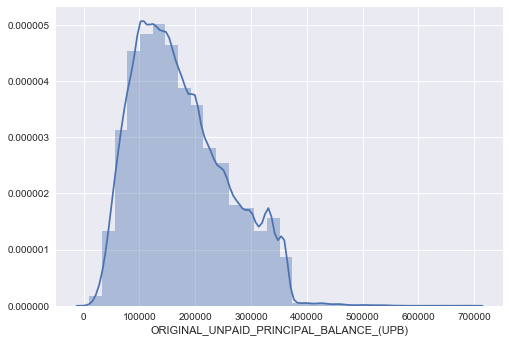

In [14]:
"""
While the value_counts() function is useful, it is hard to read as a list and gets cut off due to the significant number of values.
It should be more informative to plot the distribution instead. Let's use seaborn to plot the distribution of original upb.
Note that for in order for this to work, we had to drop the na values using dropna().
"""
import seaborn as sns
sns.distplot(adf['ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB)'].dropna(), bins = 30)

[Seaborn distplot documentation](http://seaborn.pydata.org/generated/seaborn.distplot.html)

In [15]:
#In this cell, make a distribution plot of the ORIGINAL_LOAN-TO-VALUE_(LTV) variable in the acquisition data. 
#Try adjusting the number of bins to get a better sense of the shape of the data!

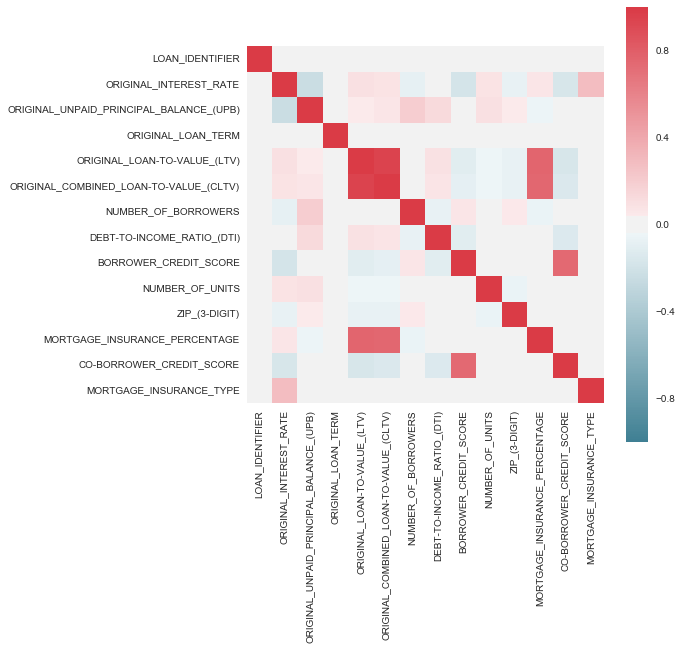

In [16]:
"""
Another way we can get a sense of our data is to view a correlational matrix of the continuous variables. Rather than viewing 
the individual distributions against one another, we can create a heatmap to show the strength of relationship between variables
as seen below. This is generally easier to visualize as the number of dimensions in the dataset increases. This is a very 
important plot, as correlation between variables is a crucial consideration in machine learning. Note the very high 
correlation between 'ORIGINAL_LOAN_TO_VALUE_(LTV)' and 'ORIGINAL_COMBINED_LOAN_TO_VALUE_(CLTV)'. We will come back to this later.
"""
f, ax = plt.subplots(figsize=(8, 8))
corr = adf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

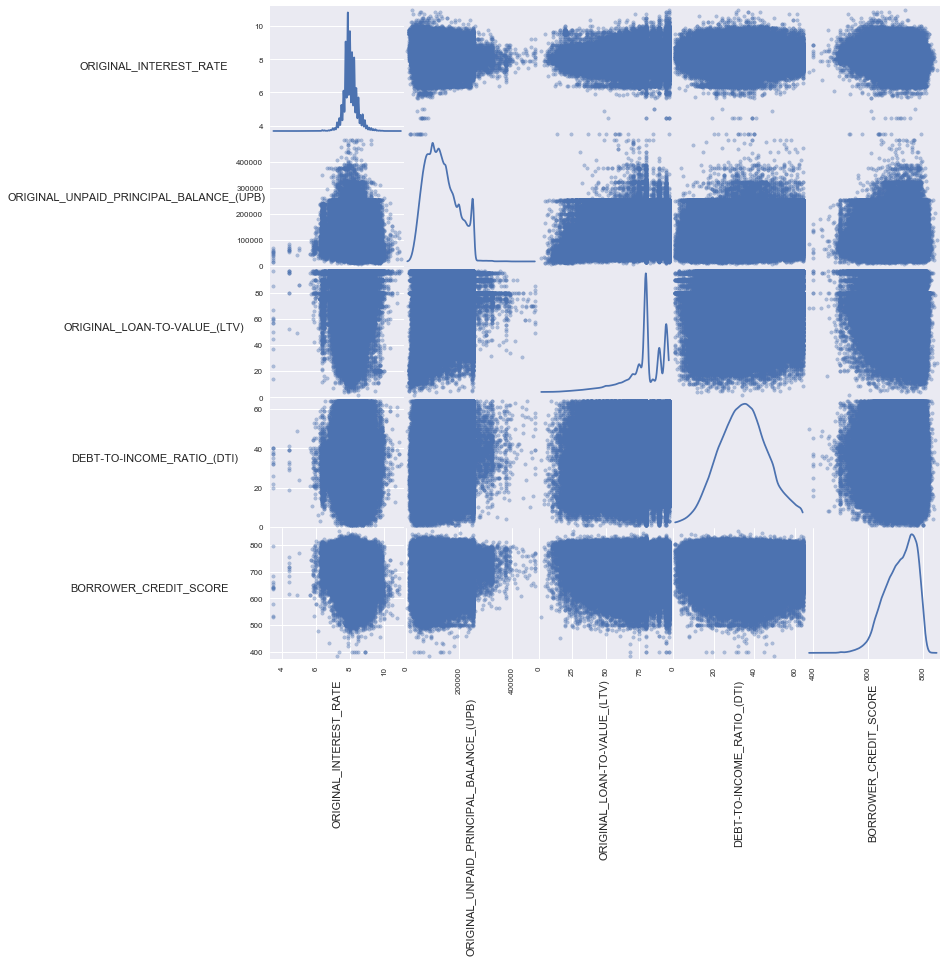

In [34]:
"""
If you want to look at a matrix of correlations instead of the heatmap, pandas scatter_matrix is probably the easiest way.
Rather than wasting the diagonal on 1:1 correlation between the variable and itself, we can replace it with the distribution
using diagonal = 'kde'. Note, this will take a minute or two to run. To speed things up I have subset the acquisition dataset.
"""
matrix_dataset = adf[['ORIGINAL_INTEREST_RATE', 'ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB)', 'ORIGINAL_LOAN-TO-VALUE_(LTV)', 
                      'DEBT-TO-INCOME_RATIO_(DTI)', 'BORROWER_CREDIT_SCORE']]

from pandas.tools.plotting import scatter_matrix
sm =scatter_matrix(matrix_dataset, alpha = 0.4, figsize = (12,12), diagonal = 'kde', grid = True)
n = len(matrix_dataset.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = sm[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 100
plt.show()

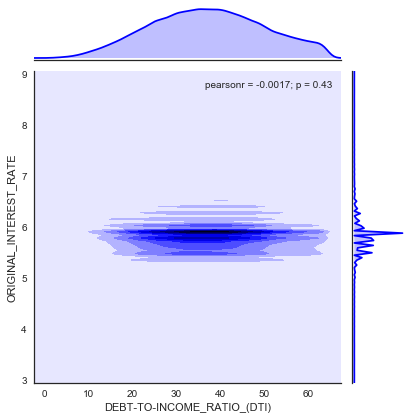

In [42]:
with sns.axes_style("white"):
    sns.jointplot("DEBT-TO-INCOME_RATIO_(DTI)", "ORIGINAL_INTEREST_RATE", kind = "kde", color = "b", data=adf)

Until now, the links that I have pasted lead directly to the documentation. However, in some circumstances it can be difficult to find or you may need more information. One of the benefits using open source software is that you can often locate the source code you need on github. Click [here](https://github.com/pandas-dev/pandas/blob/master/pandas/plotting/_misc.py#L16) to check out the source code for pandas scatter_matrix.

In [ ]:
"""
Now that we have ingested and described our data, we can begin to talk about the fun part, machine learning.
"""

[Scikit-Learn Cheat Sheet]("http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html")

In [17]:
#Clean out x values and na in our target
pdf['Current_Loan_Delq_Status'].replace(to_replace='X', value='0', inplace = True)
pdf['Current_Loan_Delq_Status'].fillna(value = '0', inplace = True)

In [18]:
#Set target to int datatype
pdf['Current_Loan_Delq_Status'] = pdf['Current_Loan_Delq_Status'].astype(str).astype(int)

In [19]:
#Group by loan and grab max loan delinquency status, check target shape
fdf = pd.DataFrame(pdf.groupby(['Loan_Identifier'], as_index = False)['Current_Loan_Delq_Status'].max())
fdf.shape

(217088, 2)

In [12]:
#Check variable shape
adf.shape

(217088, 25)

In [13]:
# adf.count()

In [14]:
#View counts per variable
# adf['SELLER_NAME'].unique()

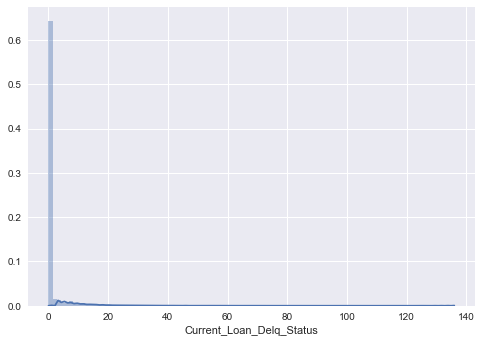

In [13]:
delq = fdf['Current_Loan_Delq_Status']
sns.distplot(delq, bins=100)

In [17]:
print(fdf['Current_Loan_Delq_Status'].value_counts())

0      261264
1       32423
2        5251
3        1756
4        1466
5        1305
6        1019
7         826
8         662
9         511
10        482
11        427
12        346
13        289
14        233
15        205
16        172
18        136
17        131
20        104
19        100
21         81
22         79
23         59
26         55
24         50
27         42
25         41
28         35
34         26
        ...  
86          3
71          3
69          3
66          3
55          3
59          3
84          2
64          2
75          2
73          2
91          2
56          2
70          2
61          2
72          2
102         1
98          1
96          1
105         1
109         1
94          1
63          1
88          1
85          1
79          1
77          1
67          1
157         1
65          1
166         1
Name: Current_Loan_Delq_Status, dtype: int64


In [14]:
(fdf['Current_Loan_Delq_Status'] > 1).value_counts()

False    189775
True      27313
Name: Current_Loan_Delq_Status, dtype: int64

In [15]:
#Create our target variable, 0 = non-delinquency, 1 = delinquency
fdf['target'] = fdf['Current_Loan_Delq_Status'] > 1

In [16]:
fdf.query('target == True').count()

Loan_Identifier             27313
Current_Loan_Delq_Status    27313
target                      27313
dtype: int64

In [17]:
#Merge our target back with variables
df = adf.merge(fdf, left_on='LOAN_IDENTIFIER', right_on='Loan_Identifier')
df.shape

(217088, 28)

In [18]:
#Drop variables that do not have enough observations, and the original loan delinquency field
df.drop(df.columns[[20,22,23,26]], axis = 1, inplace = True)

In [19]:
vdf = df[['ORIGINAL_INTEREST_RATE', 'ORIGINAL_UNPAID_PRINCIPAL_BALANCE_(UPB)', 'ORIGINAL_LOAN_TERM', 
         'ORIGINAL_LOAN-TO-VALUE_(LTV)', 'DEBT-TO-INCOME_RATIO_(DTI)', 'BORROWER_CREDIT_SCORE']]

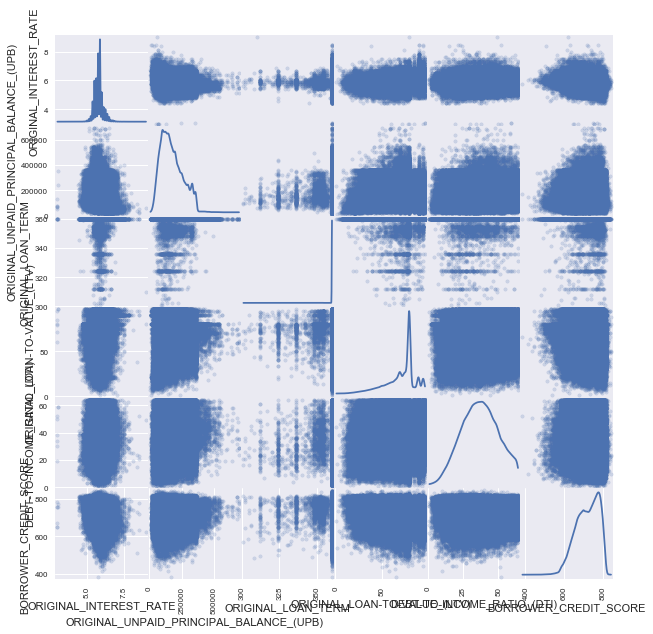

In [20]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
scatter_matrix(vdf, alpha = 0.2, figsize = (10,10), diagonal = 'kde')
plt.show()

In [21]:
df['ZIP_(3-DIGIT)'] = df['ZIP_(3-DIGIT)'].astype('str')

In [22]:
#Drop all NA, set dummy variables, multiply by 1 to get our bool target to 0 or 1
df.dropna(inplace = True)
df = pd.get_dummies(df)
df = df*1

In [69]:
# pdf.to_csv("C:\\Users\Matthew Steele\\pdf.csv")

In [23]:
#Create our variables(X) and target)y), scale X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
variables = scaler.fit_transform(np.array((df.ix[:, df.columns != 'target'])))
target = np.array((df.ix[:, df.columns == 'target'])).ravel()
variables.shape, target.shape

((199702, 1093), (199702,))

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve as vc
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as cr
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from imblearn.ensemble import BalanceCascade
from imblearn.over_sampling import SMOTE

In [25]:
#Split our data into training/testing subsets
X_train, X_test, y_train, y_test = tts(variables, target, test_size = .4)

In [26]:
print('X_train', X_train.shape, 'y_train', y_train.shape, 'X_test', X_test.shape, 'y_test', y_test.shape)

X_train (119821, 1093) y_train (119821,) X_test (79881, 1093) y_test (79881,)


In [16]:
model = SMOTE()
model.fit(X_train,y_train)

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)

In [17]:
X_resampled, y_resampled = model.sample(X_train,y_train)

In [18]:
print('X_train', X_resampled.shape, 'y_train', y_resampled.shape, 'X_test', X_test.shape, 'y_test', y_test.shape)

X_train (340748, 1074) y_train (340748,) X_test (117024, 1074) y_test (117024,)


In [19]:
asfe = pd.DataFrame(y_resampled, columns = ['Target'])
asfe.Target.value_counts()

1    170374
0    170374
Name: Target, dtype: int64

In [23]:
model = LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted = model.predict(X_test)
expected = y_test
print(cr(expected, predicted))

             precision    recall  f1-score   support

          0       0.99      0.78      0.87    113597
          1       0.09      0.71      0.16      3427

avg / total       0.96      0.78      0.85    117024



In [57]:
# model = SGDClassifier()
# n_alphas = 20
# alphas = np.logspace(-5,1,n_alphas)
# loss_functions = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
# regularization = ['none', 'l2', 'l1', 'elasticnet']
# iters = [5, 10, 20, 30]
# lr = ['optimal', 'constant']
# parameters = {'alpha' : alphas, 'loss': loss_functions, 'penalty': regularization, 'n_iter': iters, 'learning_rate': lr}
# SGD = GridSearchCV(model, parameters, n_jobs = -1)
# SGD.fit(X_train, y_train)

In [58]:
# predicted = SGD.predict(X_test)
# expected = y_test
# print(cr(expected, predicted))

In [27]:
model2 = MLPClassifier()
n_layers = [50]
activation = ['relu']
solver = ['adam']
n_alphas = np.logspace(-5,1,5)
parameters = {'hidden_layer_sizes': n_layers, 'activation': activation, 'solver': solver, 'alpha':n_alphas, 'max_iter': [500]}
NN = GridSearchCV(model2, parameters, n_jobs = -1)

In [28]:
NN.fit(X_resampled, y_resampled)

NameError: name 'X_resampled' is not defined

In [59]:
np.logspace(-5,1,10)

array([  1.00000000e-05,   4.64158883e-05,   2.15443469e-04,
         1.00000000e-03,   4.64158883e-03,   2.15443469e-02,
         1.00000000e-01,   4.64158883e-01,   2.15443469e+00,
         1.00000000e+01])

In [29]:
model = MLPClassifier()
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators = 200, max_features = 50)
model3 = GaussianNB()

model.fit(X_train, y_train)
predicted = model.predict(X_test)

model1.fit(X_train, y_train)
predicted1 = model1.predict(X_test)

model2.fit(X_train, y_train)
predicted2 = model2.predict(X_test)

model3.fit(X_train, y_train)
predicted3 = model3.predict(X_test)

expected = y_test

print("MLP",cr(expected, predicted))
print("Logistic Regression",cr(expected, predicted1))
print("RandomForest",cr(expected, predicted2))
print("Naive Bayes", cr(expected, predicted3))

MLP              precision    recall  f1-score   support

          0       0.89      0.91      0.90     70166
          1       0.25      0.21      0.23      9715

avg / total       0.81      0.83      0.82     79881

Logistic Regression              precision    recall  f1-score   support

          0       0.88      0.99      0.93     70166
          1       0.46      0.04      0.08      9715

avg / total       0.83      0.88      0.83     79881

RandomForest              precision    recall  f1-score   support

          0       0.88      1.00      0.94     70166
          1       0.65      0.01      0.01      9715

avg / total       0.85      0.88      0.82     79881

Naive Bayes              precision    recall  f1-score   support

          0       0.93      0.05      0.09     70166
          1       0.12      0.97      0.22      9715

avg / total       0.83      0.16      0.11     79881



In [18]:
model = MLPClassifier()
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators = 100)
model3 = GaussianNB()

X_train, X_test, y_train, y_test = tts(variables, target, test_size = .3)

print("MLP", cvs(model,X_train, y_train, cv = 10, n_jobs = -1))
print("Logistic Regression",cvs(model1,X_train, y_train, cv = 10, n_jobs = -1))
print("Random Forest Classifier", cvs(model2,X_train, y_train, cv = 10, n_jobs = -1))
print("GaussianNB", cvs(model3,X_train, y_train, cv = 10, n_jobs = -1))

MLP [ 0.83964844  0.84296108  0.84232629  0.84081254  0.84471898  0.838664
  0.8409102   0.83832218  0.83749207  0.84383241]
Logistic Regression [ 0.84609375  0.84647688  0.84676986  0.84696518  0.84823478  0.84799062
  0.84637922  0.84706284  0.84838127  0.84900869]
Random Forest Classifier [ 0.8453125   0.84681869  0.84584208  0.84652571  0.8489184   0.84696518
  0.84647688  0.8461839   0.8461839   0.84886219]
GaussianNB [ 0.81298828  0.81747156  0.81566483  0.82518678  0.8178622   0.82045022
  0.81459056  0.81957127  0.81664144  0.81082137]


In [21]:
model4 = KNeighborsClassifier()
print("KNN", cvs(model4, X_train, y_train, cv = 10, n_jobs =-1))

KNN [ 0.83061523  0.83109527  0.83138825  0.83080229  0.83129059  0.83133942
  0.82992334  0.83119293  0.82923971  0.83391933]


In [20]:
model5 = SGDClassifier()
n_alphas = np.logspace(-10,2,50)
parameters = { 'alpha': n_alphas, 'loss': ['log', 'perceptron', 'hinge'],
    'penalty': ['l1', 'l2', 'elasticnet'], 'n_iter': [5, 10, 15, 20] }
SGDC = GridSearchCV(model5, param_grid = parameters, cv = 10, scoring = "f1", n_jobs = -1)
SGDC.fit(X_train, y_train)
# predicted5 =SGDC.predict(X_test)
# expected = y_test
# print(cr(expected,predicted))

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2', 'elasticnet'], 'loss': ['log', 'perceptron', 'hinge'], 'n_iter': [5, 10, 15, 20], 'alpha': array([  1.00000e-10,   1.75751e-10,   3.08884e-10,   5.42868e-10,
         9.54095e-10,   1.67683e-09,   2.94705e-09,   5.17947e-09,
         9.10298e-09,   1.59986e-08,   ...    5.96362e+00,   1.04811e+01,   1.84207e+01,   3.23746e+01,
         5.68987e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [30]:
SGDC.best_estimator_

SGDClassifier(alpha=0.0068664884500429981, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=10, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [33]:
SGDB = SGDClassifier(alpha=0.0068664884500429981, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=10, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [35]:
SGDB.fit(X_train,y_train)
predicted = SGDB.predict(X_test)
expected = y_test
print(cr(expected,predicted))

             precision    recall  f1-score   support

          0       0.89      0.81      0.85     74055
          1       0.31      0.45      0.37     13713

avg / total       0.80      0.76      0.77     87768



In [28]:
predicted = SGDC.predict(X_test)

In [29]:
expected = y_test
print(cr(expected,predicted))

             precision    recall  f1-score   support

          0       0.85      0.98      0.91     74055
          1       0.43      0.07      0.11     13713

avg / total       0.78      0.84      0.79     87768



In [57]:
import pickle
day1 = pickle.dumps(SGDC.best_estimator_)

In [27]:
model132= SGDClassifier()
model132.fit(X_train,y_train)
predicted = model132.predict(X_test)
expected = y_test
print(cr(expected,predicted))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87     74055
          1       0.26      0.22      0.24     13713

avg / total       0.77      0.78      0.77     87768



In [30]:
model6 = RandomForestClassifier()
size = np.arange(5,51)*10
features = np.arange(1,8)*10
params = {'n_estimators': size, 'max_features': features, 'oob_score': [True]}
RFGSCV = GridSearchCV(model6, param_grid = params, cv = 10, scoring = "f1", n_jobs = -1)

In [ ]:
RFGSCV.fit(X_train, y_train)

In [ ]:
RFGSCV.best_score_

In [ ]:
RFGSCV.best_estimator_

In [51]:
model7 = GradientBoostingClassifier()
estimators = np.array([2000])
lr = np.logspace(-7,2,3)
the_features = np.array(['log2'])
parameaters = {'loss': ['deviance', 'exponential'], 'learning_rate': lr, 'n_estimators': estimators, 'max_features': the_features}
GBC = GridSearchCV(model7, param_grid = parameaters, cv = 3, scoring = "f1", n_jobs = -1)

In [52]:
GBC.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'loss': ['deviance', 'exponential'], 'max_features': array(['log2'],
      dtype='<U4'), 'n_estimators': array([2000]), 'learning_rate': array([  1.00000e-07,   3.16228e-03,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [53]:
GBC.best_score_

0.18081647951469595

In [35]:
GBC.scorer_

make_scorer(f1_score)

In [54]:
predicted = GBC.predict(X_test)

In [55]:
print(cr(y_test, predicted))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91     74096
          1       0.29      0.02      0.03     13672

avg / total       0.76      0.84      0.78     87768



In [ ]:
train_scores, valid_scores = vc(model2, X_train, y_train, 'gamma', np.logspace(-7,3,3), scoring = 'f1', n_jobs = -1)

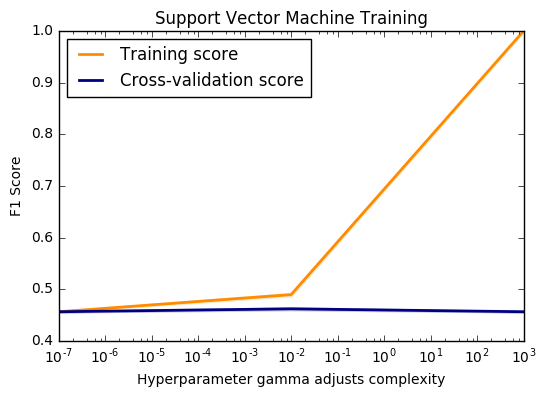

In [65]:
import matplotlib.pyplot as plt
plt.title("Support Vector Machine Training")
plt.xlabel("Hyperparameter gamma adjusts complexity")
plt.ylabel("F1 Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
param_range = np.logspace(-7,3,3)
lw = 2

plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

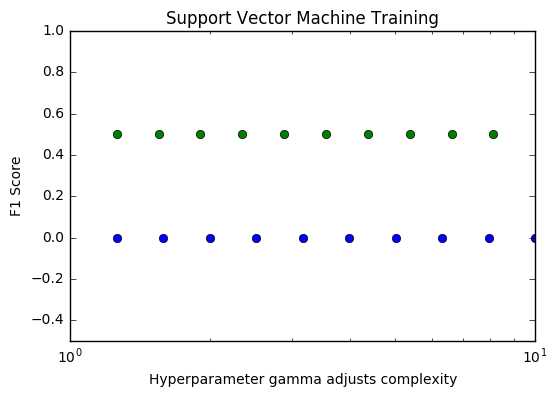

In [64]:
import matplotlib.pyplot as plt
N = 10
x1 = np.logspace(0.1, 1, N, endpoint=True)
x2 = np.logspace(0.1, 1, N, endpoint=False)
y = np.zeros(N)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])
(-0.5, 1)
plt.show()

In [ ]:
from sklearn import *